In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

from neuropacks import PVC11
from noise_correlations import (analysis,
                                discriminability,
                                null_models,
                                utils,
                                plot)
from pratplot import colorbar as pcb
from scipy.stats import special_ortho_group

%matplotlib inline

In [87]:
dim = 20
pr = 4

In [88]:
eig = np.array([0.40, 0.22, 0.15, 0.08])
remaining_eigs = np.random.uniform(low=0, high=1, size=dim - pr)
remaining_eigs /= remaining_eigs.sum () / (1 - eig.sum())
eigs = dim * np.sort(np.concatenate((eig, remaining_eigs)))

In [119]:
print(np.sum(eigs)**2 / np.sum(eigs**2))

4.180426367402959


In [89]:
rng = np.random.RandomState(2332)

In [90]:
base = np.diag(eigs)

In [91]:
sog = special_ortho_group(dim=dim)

In [92]:
mu = np.random.uniform(low=0, high=1, size=dim)
mu /= np.linalg.norm(mu)

In [96]:
n_rotations = 10000
lfis = np.zeros(n_rotations)

In [97]:
for rotation in range(n_rotations):
    R = sog.rvs(random_state=rng)
    cov = R @ base @ R.T
    lfis[rotation] = mu @ np.linalg.solve(cov, mu)

(array([0.1424, 0.3439, 0.4795, 0.5765, 0.6486, 0.7042, 0.7537, 0.7895,
        0.8221, 0.846 , 0.8677, 0.8874, 0.903 , 0.9168, 0.9293, 0.9379,
        0.9462, 0.9534, 0.9601, 0.9664, 0.9711, 0.9755, 0.979 , 0.9823,
        0.985 , 0.9871, 0.9888, 0.9907, 0.9926, 0.994 , 0.9942, 0.9952,
        0.9959, 0.9966, 0.9971, 0.9976, 0.9985, 0.9987, 0.9989, 0.9991,
        0.9994, 0.9995, 0.9995, 0.9995, 0.9995, 0.9999, 0.9999, 0.9999,
        0.9999, 1.    ]),
 array([  2.0405782 ,   7.50928518,  12.97799216,  18.44669914,
         23.91540612,  29.38411309,  34.85282007,  40.32152705,
         45.79023403,  51.25894101,  56.72764798,  62.19635496,
         67.66506194,  73.13376892,  78.6024759 ,  84.07118287,
         89.53988985,  95.00859683, 100.47730381, 105.94601079,
        111.41471776, 116.88342474, 122.35213172, 127.8208387 ,
        133.28954568, 138.75825265, 144.22695963, 149.69566661,
        155.16437359, 160.63308057, 166.10178754, 171.57049452,
        177.0392015 , 182.5079

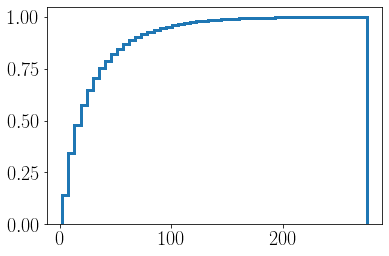

In [120]:
plt.hist(lfis, bins=50, cumulative=True, density=True, histtype='step', linewidth=3)

In [126]:
eigs_uniform = np.random.uniform(low=0, high=1, size=dim)
eigs_uniform /= eigs_uniform.sum() / eigs.sum()
eigs_uniform = np.sort(eigs_uniform)

In [131]:
rng = np.random.RandomState(2332)
base_uniform = np.diag(eigs_uniform)
lfis_uniform = np.zeros_like(lfis)

In [133]:
for rotation in range(n_rotations):
    R = sog.rvs(random_state=rng)
    cov = R @ base_uniform @ R.T
    lfis_uniform[rotation] = mu @ np.linalg.solve(cov, mu)

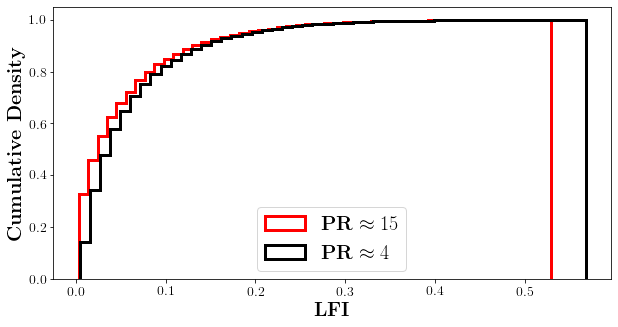

In [160]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.hist(lfis_uniform * eigs_uniform[0],
        bins=50,
        cumulative=True,
        density=True,
        histtype='step',
        linewidth=3,
        color='r',
        label=r'$\textbf{PR}\approx 15$')
ax.hist(lfis * eigs[0],
        bins=50,
        cumulative=True,
        density=True,
        histtype='step',
        linewidth=3,
        color='k',
        label=r'$\textbf{PR}\approx 4$')

ax.set_xlabel(r'\textbf{LFI}', fontsize=20)
ax.set_ylabel(r'\textbf{Cumulative Density}', fontsize=20)

ax.legend(loc='best', bbox_to_anchor=(0.65, 0.30), prop={'size': 20})
ax.tick_params(labelsize=14)

In [166]:
np.count_nonzero(0.01 > lfis_uniform * eigs_uniform[0])

2520

In [167]:
np.count_nonzero(0.01 > lfis * eigs[0])

278

In [ ]:
6500